In [2]:
import sys 
import os
import pandas as pd
import numpy as np 
import seaborn as sns

In [5]:
def prepare_df():
    df = pd.read_csv('./FlirIr/individual_thermal_out/individual_temps.csv')\
        .set_index('plot')\
        .drop(['min_x', 'max_x', 'min_y', 'max_y', 'nw_lat', 'nw_lon', 'se_lat', 'se_lon'], axis=1)

    fb = pd.read_csv('./Gantry_fieldbook_2020_Revised_Irr_TRT.csv')\
        .drop(['Experiment', 'SbEMS_ID', 'Harvest_Id', 'PI_check', 'Unnamed: 13', 'Unnamed: 14'], axis=1)\
        .set_index('Plot')

    df = fb.join(df).dropna().convert_dtypes()
    df['median'] = df['median'] - 273.15
    
    return df 

In [6]:
df = prepare_df()

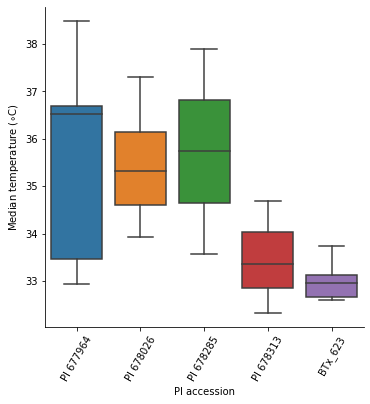

In [7]:
g = sns.catplot(x='PI_accession',
                y='median',
                kind='box',
                data=df)

g.set_axis_labels( "PI accession" , "Median temperature ($\circ$C)" )
g.set_xticklabels(rotation=60)